# Objetivo

O objetivo deste notebook é avaliar os dados disponíveis no [Portal de Dados Abertos da UFRN](http://dados.ufrn.br/) no grupo `Discentes`.

Assim sendo, a avaliação é apenas quanti-qualitativa para descobrirmos o que podemos extrair a favor do nosso projeto.

## 1. Bibliotecas

In [34]:
# install.packages("ggplot2")
# install.packages("gridExtra")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
library("dplyr")
library(ggplot2)
library(gridExtra)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



## 2. Variáveis

In [2]:
path_data <- "/Users/rsilva/Documents/UFRN/Hackathon/UFRN\ Dados/discentes"
path_save <- "/Users/rsilva/Documents/UFRN/Hackathon/Resultados"

## 3. Avaliando os Dados

In [3]:
setwd(path_data)

pattern <- "discentes"

# listando os arquivos contidos no diretorio
listoffiles <- list.files(path_data, pattern = pattern)

# abrindo os arquivos da lista
myfiles = lapply(listoffiles, read.csv2)

In [4]:
discentes <- do.call(rbind, myfiles)

In [5]:
str(discentes)

head(discentes)

'data.frame':	157192 obs. of  16 variables:
 $ matricula           : num  2.01e+09 2.01e+09 2.01e+09 2.01e+09 2.01e+09 ...
 $ nome_discente       : Factor w/ 107089 levels "Abdias Beserra Pereira Júnior",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ano_ingresso        : int  2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 ...
 $ periodo_ingresso    : int  1 2 2 2 2 1 1 2 2 2 ...
 $ forma_ingresso      : Factor w/ 46 levels "ACORDO COM A UNIVERSIDADE DE COIMBRA",..: 27 22 27 27 4 4 27 27 4 27 ...
 $ tipo_discente       : Factor w/ 2 levels "ESPECIAL","REGULAR": 2 2 2 2 1 1 2 2 1 2 ...
 $ status              : Factor w/ 9 levels "ATIVO","ATIVO - FORMANDO",..: 4 5 4 5 4 4 5 4 4 5 ...
 $ sigla_nivel_ensino  : Factor w/ 12 levels "D","E","G","L",..: 3 1 3 3 2 1 3 3 2 3 ...
 $ nivel_ensino        : Factor w/ 12 levels "DOUTORADO","FUNDAMENTAL",..: 3 1 3 3 6 1 3 3 6 3 ...
 $ id_curso            : int  111635057 9300591 2000121 10426760 NA NA 9295710 10320810 NA 2000068 ...
 $ nome_curso          : Facto

matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
2009021967,Abdias Beserra Pereira Júnior,2009,1,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,111635057,HISTÓRIA,PRESENCIAL,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
2009115809,ABDO FARRET NETO,2009,2,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CONCLUÍDO,D,DOUTORADO,9300591,DOUTORADO EM DESENVOLVIMENTO E INOVAÇÃO TECNOLÓGICA EM MEDICAMENTOS,PRESENCIAL,4847,PROGRAMA DE PÓS-GRADUAÇÃO EM DESENVOLVIMENTO E INOVAÇÃO TECNOLÓGICA EM MEDICAMENTOS,441,CENTRO DE CIÊNCIAS DA SAÚDE
2009048490,ABELARDO LOPES DE ALBUQUERQUE MACHADO NETO,2009,2,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,2000121,ECOLOGIA,PRESENCIAL,440,CENTRO DE BIOCIÊNCIAS,440,CENTRO DE BIOCIÊNCIAS
2009020804,ABELARDO MONTEIRO BEZERRA DE MELO NETO,2009,2,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,10426760,GESTÃO DE POLÍTICAS PÚBLICAS,PRESENCIAL,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
2009119915,ABIGAIL CALDAS BATISTA GONDIM,2009,2,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,E,MESTRADO,NA,,,NA,,NA,
2009110811,ABIGAIL NOÁDIA BARBALHO DA SILVA,2009,1,ALUNO ESPECIAL POS-GRADUACAO,ESPECIAL,CANCELADO,D,DOUTORADO,NA,,,NA,,NA,


### 3.1 Ingressantes por Periodo

In [14]:
ingressantes <- as.data.frame(table(discentes$ano_ingresso,discentes$periodo_ingresso))
# ingressantes <- table(discentes$ano_ingresso,discentes$periodo_ingresso)

In [15]:
names(ingressantes)[1] <- "ano"
names(ingressantes)[2] <- "semestre"
names(ingressantes)[3] <- "valores"

# ingressantes$Ano <- as.numeric(as.character(ingressantes$Ano))
# ingressantes$Freq <- as.numeric(ingressantes$Freq)

head(ingressantes)

ano,semestre,valores
2009,0,7
2010,0,90
2011,0,0
2012,0,54
2013,0,182
2014,0,165


In [16]:
str(ingressantes)

'data.frame':	36 obs. of  3 variables:
 $ ano     : Factor w/ 9 levels "2009","2010",..: 1 2 3 4 5 6 7 8 9 1 ...
 $ semestre: Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 2 ...
 $ valores : int  7 90 0 54 182 165 209 142 185 6709 ...


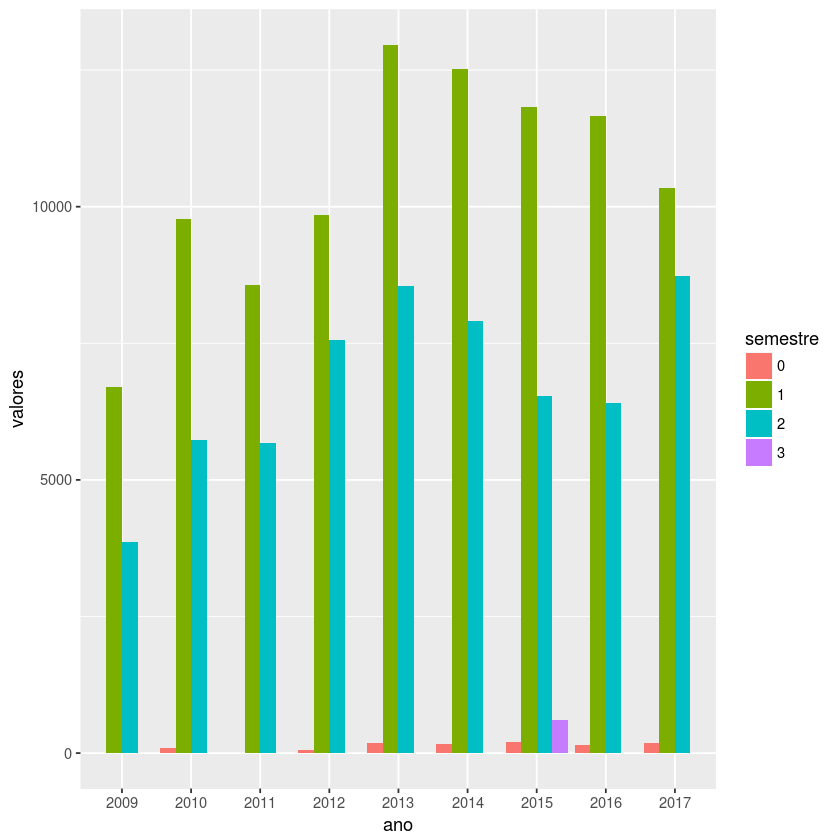

In [20]:
myplot <- ggplot(ingressantes,aes(ano,valores,fill=semestre))+
   geom_bar(position="dodge",stat="identity")#+
#    facet_wrap(~ano,nrow=3)

print(myplot)

### 3.2 Ingressantes por Nível de Ensino

In [21]:
ensino <- as.data.frame(table(discentes$ano_ingresso, discentes$nivel_ensino))

In [22]:
names(ensino)[1] <- "ano"
names(ensino)[2] <- "nivel"
names(ensino)[3] <- "valores"

str(ensino)
head(ensino)

'data.frame':	108 obs. of  3 variables:
 $ ano    : Factor w/ 9 levels "2009","2010",..: 1 2 3 4 5 6 7 8 9 1 ...
 $ nivel  : Factor w/ 12 levels "DOUTORADO","FUNDAMENTAL",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ valores: int  456 629 616 618 722 681 727 826 689 30 ...


ano,nivel,valores
2009,DOUTORADO,456
2010,DOUTORADO,629
2011,DOUTORADO,616
2012,DOUTORADO,618
2013,DOUTORADO,722
2014,DOUTORADO,681


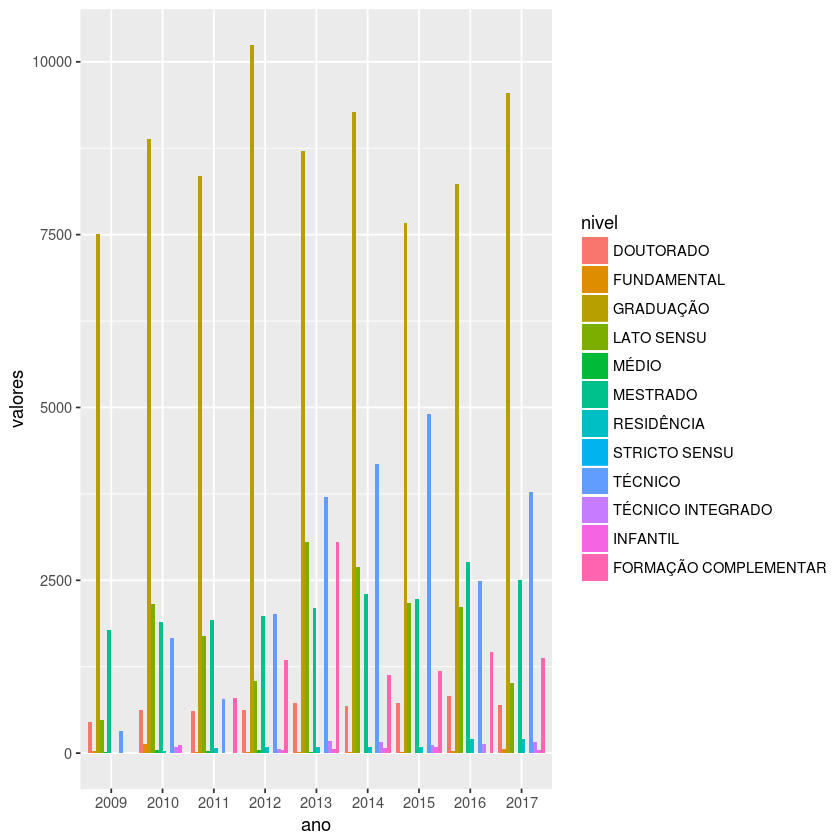

In [23]:
myplot <- ggplot(ensino,aes(ano,valores,fill=nivel))+
   geom_bar(position="dodge",stat="identity")#+
#    facet_wrap(~ano,nrow=3)

print(myplot)

### 3.3 Ingressantes por Centro de Ensino e Modalidade

In [26]:
centro <- as.data.frame(table(discentes$ano_ingresso, discentes$modalidade_educacao, discentes$nome_unidade_gestora))

In [27]:
names(centro)[1] <- "ano"
names(centro)[2] <- "modalidade"
names(centro)[3] <- "centro"
names(centro)[4] <- "valores"

str(centro)
head(centro)

'data.frame':	504 obs. of  4 variables:
 $ ano       : Factor w/ 9 levels "2009","2010",..: 1 2 3 4 5 6 7 8 9 1 ...
 $ modalidade: Factor w/ 4 levels "","A DISTÂNCIA",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ centro    : Factor w/ 14 levels "","CENTRO DE  ENSINO SUPERIOR DO SERIDÓ",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ valores   : int  1382 1388 1255 1399 1263 1296 1348 1705 1404 0 ...


ano,modalidade,centro,valores
2009,,,1382
2010,,,1388
2011,,,1255
2012,,,1399
2013,,,1263
2014,,,1296


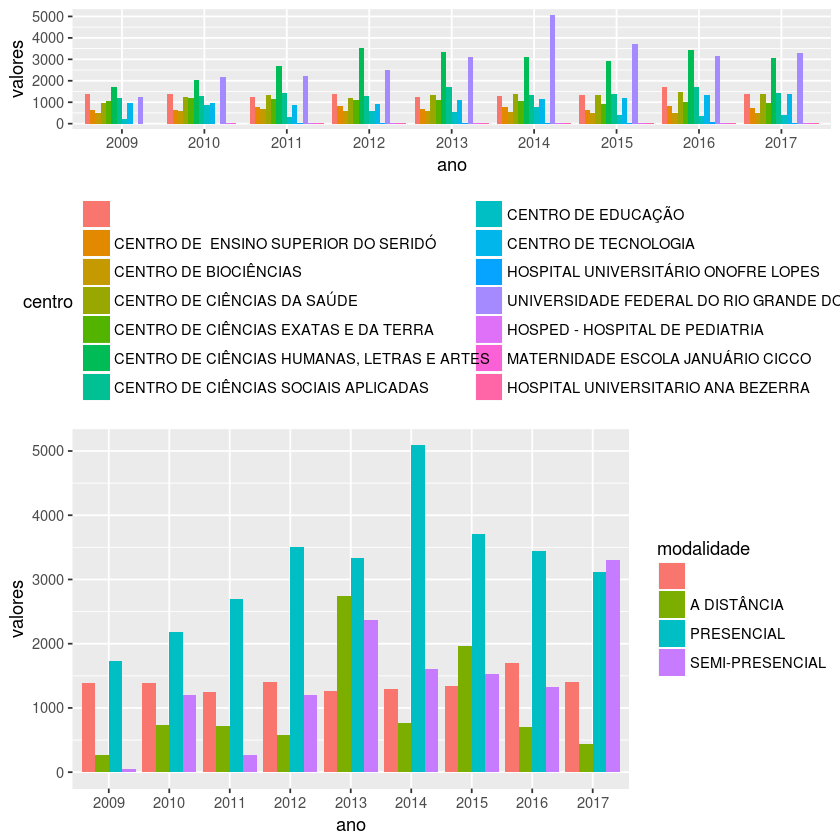

In [45]:
graf1 <- ggplot(centro,aes(ano,valores,fill=centro))+
    geom_bar(position="dodge",stat="identity")+
    theme(legend.position="bottom")+
    guides(fill=guide_legend(ncol=2,bycol=TRUE))

graf2 <- ggplot(centro,aes(ano,valores,fill=modalidade))+
   geom_bar(position="dodge",stat="identity")

grid.arrange(graf1, graf2, ncol=1)

### 3.4 Agrupamento de Ingressos por Alunos

Neste caso há uma ambiguidade, o mesmo aluno pode ser homonimo ou de fato um re-ingressante. No caso de re-ingressante pode ser devido a mudança de curso, acesso à pós-graduação ou ingresso em um curso técnico.

#### Calculando quantas vezes cada aluno ingressou na UFRN

In [46]:
alunos <- as.data.frame(table(discentes$nome_discente))

names(alunos)[1] <- "nome"
names(alunos)[2] <- "total"

str(alunos)
head(alunos)

'data.frame':	107089 obs. of  2 variables:
 $ nome : Factor w/ 107089 levels "Abdias Beserra Pereira Júnior",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total: int  2 1 1 3 1 4 3 1 2 1 ...


nome,total
Abdias Beserra Pereira Júnior,2
ABDO FARRET NETO,1
ABELARDO LOPES DE ALBUQUERQUE MACHADO NETO,1
ABELARDO MONTEIRO BEZERRA DE MELO NETO,3
ABIGAIL CALDAS BATISTA GONDIM,1
ABIGAIL NOÁDIA BARBALHO DA SILVA,4


#### Calculando quantas vezes cada `frequencia` se repete 

In [47]:
frequencia <- as.data.frame(table(alunos$total))

names(frequencia)[1] <- "freq"
names(frequencia)[2] <- "total"

str(frequencia)
head(frequencia)

'data.frame':	14 obs. of  2 variables:
 $ freq : Factor w/ 14 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ total: int  74638 21087 7251 2675 969 307 102 36 16 4 ...


freq,total
1,74638
2,21087
3,7251
4,2675
5,969
6,307


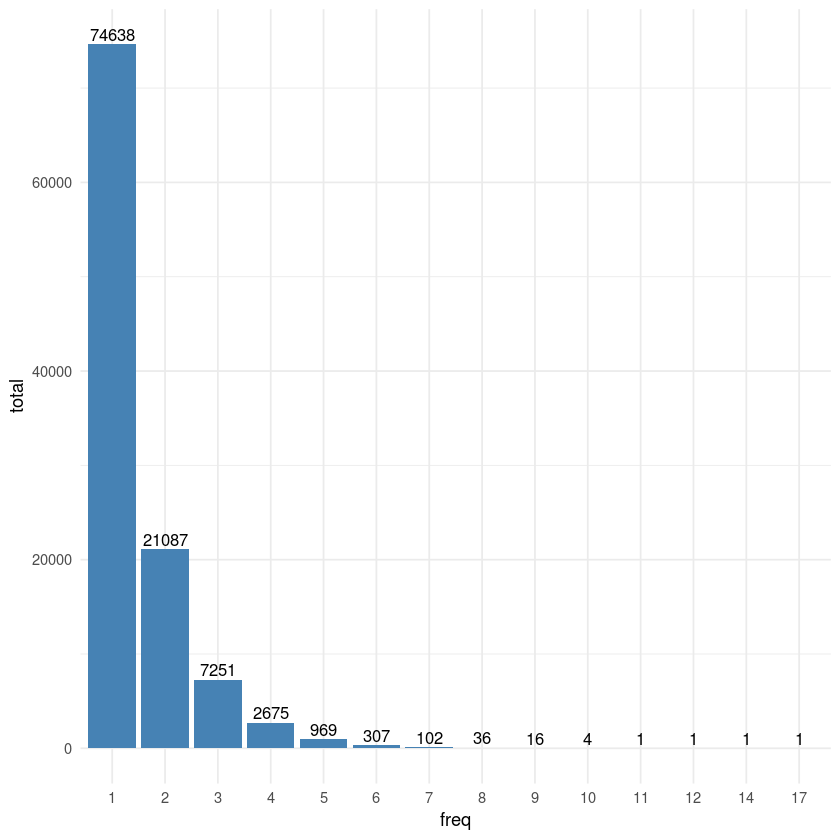

In [57]:
myplot <- ggplot(frequencia, aes(freq, total)) +
    geom_bar(stat="identity", fill="steelblue")+
    geom_text(aes(label=total), vjust=-0.3, size=3.5)+
    theme_minimal()

print(myplot)

In [63]:
alunos <- arrange(alunos,desc(total))

In [64]:
head(alunos)

nome,total
MARIA APARECIDA DA SILVA,17
MAÍSA CARVALHO DE SOUZA VIEGA,14
MARINHO BEZERRA DE ARAUJO FILHO,12
MARIA CLARA QUEIROZ DE SOUSA,11
ANA CAROLINA MORAIS SALES,10
RIVALDO FERNANDES PEREIRA,10


In [75]:
subset(discentes, nome_discente == "MARIA APARECIDA DA SILVA")

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
7012,2009073398,MARIA APARECIDA DA SILVA,2009,2,REINGRESSO AUTOMATICO,REGULAR,CANCELADO,G,GRADUAÇÃO,2000009,CIÊNCIAS BIOLÓGICAS,PRESENCIAL,440,CENTRO DE BIOCIÊNCIAS,440,CENTRO DE BIOCIÊNCIAS
21053,2010017498,MARIA APARECIDA DA SILVA,2010,1,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2000069,TURISMO,PRESENCIAL,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
21054,2010084429,MARIA APARECIDA DA SILVA,2010,1,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2671321,GEOGRAFIA,A DISTÂNCIA,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
21055,2010079090,MARIA APARECIDA DA SILVA,2010,1,REINGRESSO AUTOMATICO,REGULAR,CANCELADO,G,GRADUAÇÃO,2000054,MATEMÁTICA,PRESENCIAL,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
35739,2011505427,MARIA APARECIDA DA SILVA,2011,2,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,86979169,CURSO DE LÍNGUA INGLESA  BÁSICO,PRESENCIAL,6042,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTURAS ESTRANGEIRAS MODERNAS",442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
52287,2012105072,MARIA APARECIDA DA SILVA,2012,1,SELEÇÃO DE PÓS-GRADUAÇÃO,REGULAR,CANCELADO,E,MESTRADO,84739892,MESTRADO PROFISSIONAL EM MATEMÁTICA EM REDE NACIONAL,PRESENCIAL,5671,PROGRAMA DE PÓS-GRADUAÇÃO EM MATEMÁTICA EM REDE NACIONAL,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
52288,2012961600,MARIA APARECIDA DA SILVA,2012,2,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2000068,SERVIÇO SOCIAL,PRESENCIAL,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
52289,2012506877,MARIA APARECIDA DA SILVA,2012,1,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,86979728,CURSO DE LÍNGUA INGLESA PARA FINS ACADÊMICOS,PRESENCIAL,6042,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTURAS ESTRANGEIRAS MODERNAS",442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
72429,2013044605,MARIA APARECIDA DA SILVA,2013,1,ALUNO ESPECIAL,ESPECIAL,ATIVO,G,GRADUAÇÃO,NA,,,NA,,NA,
72430,2013350304,MARIA APARECIDA DA SILVA,2013,2,PROCESSO SELETIVO,REGULAR,ATIVO,T,TÉCNICO,100755694,TÉCNICO EM COOPERATIVISMO A DISTÂNCIA E-TEC,A DISTÂNCIA,351,ESCOLA AGRÍCOLA DE JUNDIAÍ,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


### 3.5 Ingressos por Aluno e Ano

In [76]:
alunos_ano <- as.data.frame(table(discentes$nome_discente, discentes$ano_ingresso))

names(alunos_ano)[1] <- "nome"
names(alunos_ano)[2] <- "ano"
names(alunos_ano)[3] <- "total"

str(alunos_ano)
head(alunos_ano)

'data.frame':	963801 obs. of  3 variables:
 $ nome : Factor w/ 107089 levels "Abdias Beserra Pereira Júnior",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ano  : Factor w/ 9 levels "2009","2010",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ total: int  1 1 1 1 1 1 1 1 1 1 ...


nome,ano,total
Abdias Beserra Pereira Júnior,2009,1
ABDO FARRET NETO,2009,1
ABELARDO LOPES DE ALBUQUERQUE MACHADO NETO,2009,1
ABELARDO MONTEIRO BEZERRA DE MELO NETO,2009,1
ABIGAIL CALDAS BATISTA GONDIM,2009,1
ABIGAIL NOÁDIA BARBALHO DA SILVA,2009,1


In [79]:
frequencia_ano <- as.data.frame(table(alunos_ano$ano, alunos_ano$total))

names(frequencia_ano)[1] <- "ano"
names(frequencia_ano)[2] <- "freq"
names(frequencia_ano)[3] <- "total"

frequencia_ano <- frequencia_ano[!(frequencia_ano$freq==0),]
frequencia_ano <- droplevels(frequencia_ano)

str(frequencia_ano)
head(frequencia_ano)

'data.frame':	45 obs. of  3 variables:
 $ ano  : Factor w/ 9 levels "2009","2010",..: 1 2 3 4 5 6 7 8 9 1 ...
 $ freq : Factor w/ 5 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ total: int  9993 14295 12775 15606 17553 17454 17082 16245 17567 288 ...


,ano,freq,total
10,2009,1,9993
11,2010,1,14295
12,2011,1,12775
13,2012,1,15606
14,2013,1,17553
15,2014,1,17454


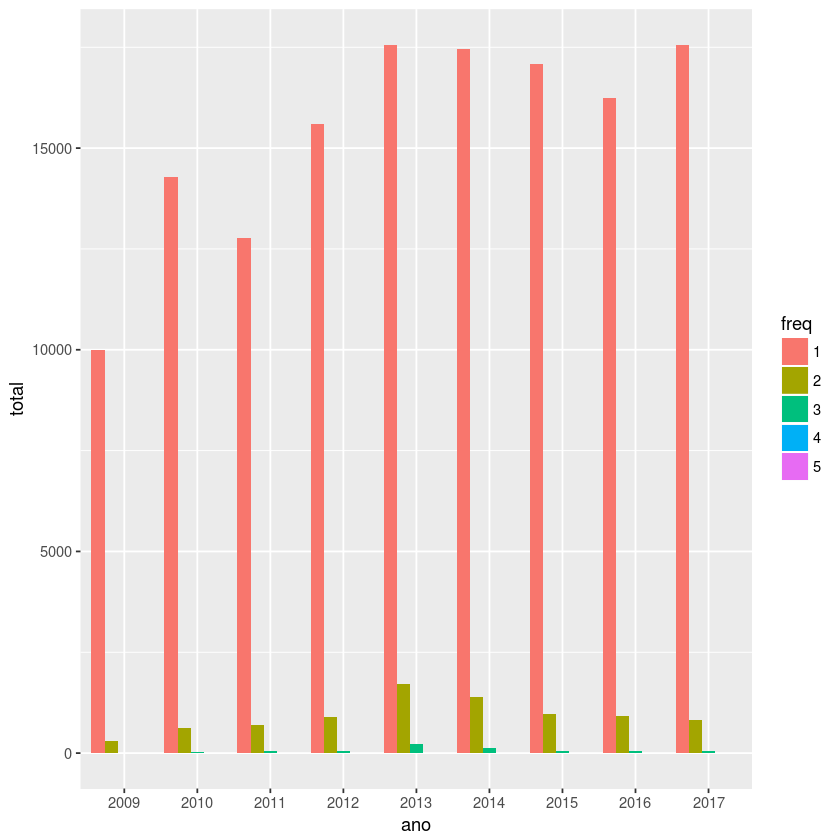

In [81]:
myplot <- ggplot(frequencia_ano,aes(ano,total,fill=freq))+
   geom_bar(position="dodge",stat="identity")#+
#    facet_wrap(~ano,nrow=3)

print(myplot)

In [82]:
alunos_ano <- arrange(alunos_ano,desc(total))

In [83]:
head(alunos_ano)

nome,ano,total
ALESON BELO DA SILVA,2013,5
FELIPE DIDIER GAMEIRO,2013,5
JOÃO BATISTA DA SILVA,2009,4
SAYONARA OLIVEIRA FREITAS,2010,4
ANA PAULA PEREIRA DO NASCIMENTO SILVA,2010,4
MARIA DAS GRAÇAS DA SILVA,2012,4


In [84]:
subset(discentes, nome_discente == "ALESON BELO DA SILVA")

,matricula,nome_discente,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
58560,2013065893,ALESON BELO DA SILVA,2013,2,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,2000002,ADMINISTRAÇÃO,PRESENCIAL,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
58561,2013082132,ALESON BELO DA SILVA,2013,2,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000029,ENGENHARIA DE PRODUÇÃO,PRESENCIAL,445,CENTRO DE TECNOLOGIA,445,CENTRO DE TECNOLOGIA
58562,2013042558,ALESON BELO DA SILVA,2013,1,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,111635066,MATEMÁTICA,PRESENCIAL,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
58563,2013046600,ALESON BELO DA SILVA,2013,1,SiSU,REGULAR,CANCELADO,G,GRADUAÇÃO,92127264,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069,INSTITUTO METROPOLE DIGITAL,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
58564,2013315118,ALESON BELO DA SILVA,2013,1,PROCESSO SELETIVO,REGULAR,CANCELADO,T,TÉCNICO,96054058,CURSO TÉCNICO DA METRÓPOLE DIGITAL,SEMI-PRESENCIAL,6069,INSTITUTO METROPOLE DIGITAL,605,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
120000,2016500620,ALESON BELO DA SILVA,2016,1,PROCESSO SELETIVO,REGULAR,ATIVO,F,FORMAÇÃO COMPLEMENTAR,86980317,CURSO DE LÍNGUA ESPANHOLA - BÁSICO,PRESENCIAL,6042,"INSTITUTO ÁGORA - LÍNGUAS, LITERATURAS E CULTURAS ESTRANGEIRAS MODERNAS",442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"


### - Estudos a Parte

In [6]:
summary(discentes)

   matricula                                 nome_discente     ano_ingresso 
 Min.   :2.009e+08   MARIA APARECIDA DA SILVA       :    17   Min.   :2009  
 1st Qu.:2.011e+09   MAÍSA CARVALHO DE SOUZA VIEGA  :    14   1st Qu.:2011  
 Median :2.014e+09   MARINHO BEZERRA DE ARAUJO FILHO:    12   Median :2013  
 Mean   :7.238e+09   MARIA CLARA QUEIROZ DE SOUSA   :    11   Mean   :2013  
 3rd Qu.:2.015e+10   ANA CAROLINA MORAIS SALES      :    10   3rd Qu.:2015  
 Max.   :2.018e+10   RIVALDO FERNANDES PEREIRA      :    10   Max.   :2017  
 NA's   :2           (Other)                        :157118                 
 periodo_ingresso                       forma_ingresso   tipo_discente   
 Min.   :0.00     PROCESSO SELETIVO            :48179   ESPECIAL: 12440  
 1st Qu.:1.00     VESTIBULAR                   :37057   REGULAR :144752  
 Median :1.00     SiSU                         :30623                    
 Mean   :1.39     SELEÇÃO DE PÓS-GRADUAÇÃO     :16431                    
 3rd Qu.:2.00 

In [7]:
str(discentes)

'data.frame':	157192 obs. of  16 variables:
 $ matricula           : num  2.01e+09 2.01e+09 2.01e+09 2.01e+09 2.01e+09 ...
 $ nome_discente       : Factor w/ 107089 levels "Abdias Beserra Pereira Júnior",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ ano_ingresso        : int  2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 ...
 $ periodo_ingresso    : int  1 2 2 2 2 1 1 2 2 2 ...
 $ forma_ingresso      : Factor w/ 46 levels "ACORDO COM A UNIVERSIDADE DE COIMBRA",..: 27 22 27 27 4 4 27 27 4 27 ...
 $ tipo_discente       : Factor w/ 2 levels "ESPECIAL","REGULAR": 2 2 2 2 1 1 2 2 1 2 ...
 $ status              : Factor w/ 9 levels "ATIVO","ATIVO - FORMANDO",..: 4 5 4 5 4 4 5 4 4 5 ...
 $ sigla_nivel_ensino  : Factor w/ 12 levels "D","E","G","L",..: 3 1 3 3 2 1 3 3 2 3 ...
 $ nivel_ensino        : Factor w/ 12 levels "DOUTORADO","FUNDAMENTAL",..: 3 1 3 3 6 1 3 3 6 3 ...
 $ id_curso            : int  111635057 9300591 2000121 10426760 NA NA 9295710 10320810 NA 2000068 ...
 $ nome_curso          : Facto

In [9]:
# calculando os valores NAs no dataset

total <- nrow(discentes)
na_matricula <- sum(is.na(discentes$matricula))
na_nome_discente <- sum(is.na(discentes$nome_discente))
na_ano_ingresso <- sum(is.na(discentes$ano_ingresso))
na_periodo_ingresso <- sum(is.na(discentes$periodo_ingresso))
na_forma_ingresso <- sum(is.na(discentes$forma_ingresso))
na_tipo_discente <- sum(is.na(discentes$tipo_discente))
na_status <- sum(is.na(discentes$status))
na_sigla_nivel_ensino <- sum(is.na(discentes$sigla_nivel_ensino))
na_nivel_ensino <- sum(is.na(discentes$nivel_ensino))
na_id_curso <- sum(is.na(discentes$id_curso))
na_nome_curso <- sum(is.na(discentes$nome_curso))
na_modalidade_educacao <- sum(is.na(discentes$modalidade_educacao))
na_id_unidade <- sum(is.na(discentes$id_unidade))
na_nome_unidade <- sum(is.na(discentes$nome_unidade))
na_id_unidade_gestora <- sum(is.na(discentes$id_unidade_gestora))
na_nome_unidade_gestora <- sum(is.na(discentes$nome_unidade_gestora))

In [10]:
sprintf("%.2f%% para Matricula", (na_matricula/total)*100)
sprintf("%.2f%% para Nome Discente", (na_nome_discente/total)*100)
sprintf("%.2f%% para Ano Ingresso", (na_ano_ingresso/total)*100)
sprintf("%.2f%% para Periodo Ingresso", (na_periodo_ingresso/total)*100)
sprintf("%.2f%% para Forma Ingresso", (na_forma_ingresso/total)*100)
sprintf("%.2f%% para Tipo Discente", (na_tipo_discente/total)*100)
sprintf("%.2f%% para Status", (na_status/total)*100)
sprintf("%.2f%% para Sg Nivel Ensino", (na_sigla_nivel_ensino/total)*100)
sprintf("%.2f%% para Nivel Ensino", (na_nivel_ensino/total)*100)
sprintf("%.2f%% para Id Curso", (na_id_curso/total)*100)
sprintf("%.2f%% para Nome Curso", (na_nome_curso/total)*100)
sprintf("%.2f%% para Modalidaed", (na_modalidade_educacao/total)*100)
sprintf("%.2f%% para Id Unidade", (na_id_unidade/total)*100)
sprintf("%.2f%% para Nome Unidade", (na_nome_unidade/total)*100)
sprintf("%.2f%% para Id Unidade Gestora", (na_id_unidade_gestora/total)*100)
sprintf("%.2f%% para Unidade Gestora", (na_nome_unidade_gestora/total)*100)


[1] "0.00% para Matricula"

[1] "0.00% para Nome Discente"

[1] "0.00% para Ano Ingresso"

[1] "0.22% para Periodo Ingresso"

[1] "0.00% para Forma Ingresso"

[1] "0.00% para Tipo Discente"

[1] "0.00% para Status"

[1] "0.00% para Sg Nivel Ensino"

[1] "0.00% para Nivel Ensino"

[1] "7.91% para Id Curso"

[1] "0.00% para Nome Curso"

[1] "0.00% para Modalidaed"

[1] "7.91% para Id Unidade"

[1] "0.00% para Nome Unidade"

[1] "7.91% para Id Unidade Gestora"

[1] "0.00% para Unidade Gestora"

In [11]:
# removendo todos os valores NAs do dataset

reduced <- discentes[complete.cases(discentes), ]

In [12]:
# salvando o dataset em CSV para facilitar trabalhos futuros
setwd(path_save)

write.csv(reduced, "alunos.csv", row.names=FALSE)